In [17]:
import torch
import numpy as np
import torchvision.datasets
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

In [2]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [3]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

In [4]:
len(y_train), len(y_test)

(60000, 10000)

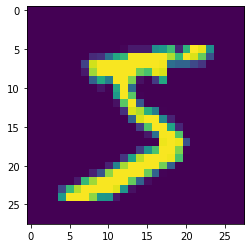

tensor(5)


In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [6]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [35]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=3, padding=2)
        self.act1  = torch.nn.ReLU()
        
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=6, kernel_size=3, padding=2)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.conv3 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=3, padding=0)
        self.act3  = torch.nn.ReLU()
        
        self.conv4 = torch.nn.Conv2d(
            in_channels=16, out_channels=16, kernel_size=3, padding=0)
        self.act4  = torch.nn.ReLU()
        
        self.pool3 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act5  = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act6  = torch.nn.ReLU()
        
        self.fc3   = torch.nn.Linear(84, 84)
        self.act7  = torch.nn.ReLU()
        
        self.fc4   = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.act3(x)
        
        x = self.conv4(x)
        x = self.act4(x)
        x = self.pool3(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act5(x)
        x = self.fc2(x)
        x = self.act6(x)
        x = self.fc3(x)
        x = self.act7(x)
        x = self.fc4(x)
        return x
    
lenet5 = LeNet5().to('cuda')

In [36]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=3.0e-4)

In [37]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to('cuda')
y_test = y_test.to('cuda')

cnt=1
accuracy=[]
for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to('cuda')
        y_batch = y_train[batch_indexes].to('cuda')
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
    test_preds=[]
    for j in range(0, len(X_test), batch_size):
        test_pred=lenet5.forward(X_test[j:j+batch_size].to('cuda'))
        test_preds.append(test_pred.argmax(dim=1).cpu().detach().numpy())
#     print((test_preds == y_test_1).float().mean())
    acc=accuracy_score(y_test.cpu(),np.asarray(test_preds).flatten())
    accuracy.append(acc)
#     print((test_preds == y_test_1).float().mean())
    print('epoch ',cnt,': accuracy: ',acc)
    cnt+=1
    

epoch  1 : accuracy:  0.9669
epoch  2 : accuracy:  0.9787
epoch  3 : accuracy:  0.9848
epoch  4 : accuracy:  0.9846
epoch  5 : accuracy:  0.9841
epoch  6 : accuracy:  0.9824
epoch  7 : accuracy:  0.9879
epoch  8 : accuracy:  0.9839
epoch  9 : accuracy:  0.9874
epoch  10 : accuracy:  0.9905
epoch  11 : accuracy:  0.9889
epoch  12 : accuracy:  0.99
epoch  13 : accuracy:  0.9896
epoch  14 : accuracy:  0.989
epoch  15 : accuracy:  0.9893
epoch  16 : accuracy:  0.9889
epoch  17 : accuracy:  0.9903
epoch  18 : accuracy:  0.9901
epoch  19 : accuracy:  0.9897
epoch  20 : accuracy:  0.9894
epoch  21 : accuracy:  0.9909
epoch  22 : accuracy:  0.9895
epoch  23 : accuracy:  0.9907
epoch  24 : accuracy:  0.9908
epoch  25 : accuracy:  0.9905
epoch  26 : accuracy:  0.9896
epoch  27 : accuracy:  0.9913
epoch  28 : accuracy:  0.9861
epoch  29 : accuracy:  0.9908
epoch  30 : accuracy:  0.989
epoch  31 : accuracy:  0.9897
epoch  32 : accuracy:  0.9916
epoch  33 : accuracy:  0.9884
epoch  34 : accuracy:  

KeyboardInterrupt: 

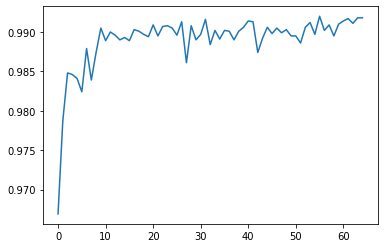

In [38]:
plt.plot(accuracy)